# **Examen final de Desarrollo de Aplicaciones para la Visualización de Datos**

Nombre: Alejandro 

Apellidos: Valbuena Núñez

Tiempo: *2 horas y 30 minutos*

## **Contexto del ejercicio**

Un banco portugues desea entender en más detalle las campañas de marketing directo que ha realizado en los últimos meses a más de 40 mil clientes. Las campañas de marketing se basaron en llamadas telefónicas. Muchas veces era necesario más de un contacto con un mismo cliente, para saber si el producto (depósito bancario) sería ('sí') o no ('no') contratado.

El objetivo del análisis es buscar patrones para entender mejor que tipo de perfil tienen los clientes que han contratado el depósito para buscar en su base de datos otros clientes parecidos para aumentar la respuesta y el ROI de futuras campañas de marketing directo intentando vender el mismo depósito. Por lo tanto, se pide:

1.  Realizar un análisis descriptivo de los datos con al menos, 6 visualizaciones diferentes. (3 Puntos) (*)

2.  Montar un dashboard con al menos, 4 visualizaciones diferentes, que incluyan 2 componentes interactivas y 1 callback (5 Puntos) (*)

3. Concluir todo este análisis haciendo recomendaciones para la mejora de futuras campañas de contacto directo a partir de los resultados obtenidos de los análisis realizados con los datos. (2 Puntos)

Para realizar este análisis se provee de un juego de datos con las siguientes variables:

- age	- Edad (numérica)
- job - Ocupación (categórica)
- marital - Estado civil (categórica)
- education - Nivel educativo (categórica)
- default - ¿Tiene algún prestamo en default? (binaria)
- balance - Balance medio anual en euros (numérica)
- housing - ¿Tiene una hipoteca? (binaria)
- loan -  ¿Tiene un prestamo personal? (binaria)
- contact - Tipo de contacto (categórica)
- day_of_week - Último día de la semana que fue contactado (fecha)
- month - Último mes que fue contactado (fecha)
- duration - Duración de la última vez que fue contactado en segundos (entera)
- campaign - Número de veces que fue contactado (numérica)
- pdays - Número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior (numérica; -1 significa que el cliente no fue contactado previamente)
- previous - Número de contactos realizados durante esta campaña y para este cliente (numérica, incluye el último contacto)
- poutcome - Resultado de la campaña de marketing anterior (categórica; 'failure','nonexistent','success')
- y - El cliente ha contratado el depósito (binaria, yes, no)

Recuerda, si tuvieras que programar una función, comenta los argumentos de entrada y salida. **Explica el orden que estás siguiendo a la hora de elegir las visualizaciones y comenta las conclusiones que vas sacando.**


**(*) IMPORTANTE**: Puedes elegir realizar un modelo de clasificación y realizar visualizaciones en torno a ese modelo en los primeros dos apartados. Esta parte no es obligatoria. El objetivo de la clasificación sería predecir si el cliente se suscribirá a un depósito bancario (variable y).








### **Librerías necesarias**

In [40]:
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
import dash
from dash import dcc, html
from dash.dependencies import Input, Output


### **Análisis descriptivos**

# Parte 1

In [68]:
df = pd.read_csv('bank-full.csv', sep=';')

#Analizamos el dataset
print(df.head())
print(df.describe())
print(df.info())
print(df.isna().sum())


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000

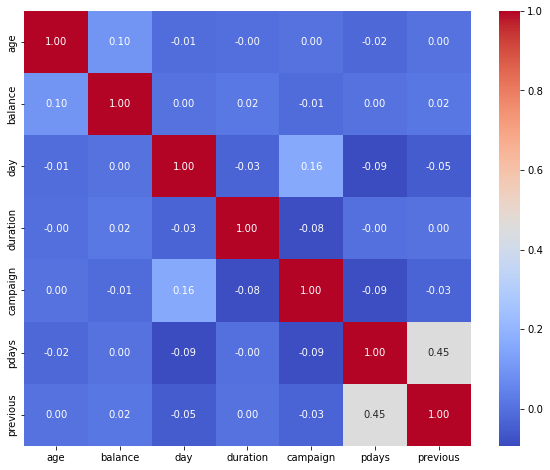

In [83]:
#PREGUNTA 1

#Visualización cuartiles de edad
fig = px.box(df, x='age', title='Cuartiles de edad')
fig.show()

#Gráfico balance vs edad
fig = px.scatter(df, x='age', y='balance', title='Distribución de Edades vs Balance')
fig.show()

# Mapa de calor de la matriz de correlacion
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

#Distribución de resultados por día de contacto del mes
fig = px.histogram(df, x='day', color='y', title='Distribución de resultados por día de contacto del mes')
fig.update_layout(xaxis_title='Día', yaxis_title='Cantidad')
fig.show()

#Distribucion compradores en funcion del estado civil
fig = px.histogram(df, x='marital', title='Distribución de estado civil compradores')
fig.update_layout(xaxis_title='Estado Civil', yaxis_title='Cantidad')
fig.show()

# Valores de y y de marital
fig = px.histogram(df, x='marital', color='y', title='Distribución de estado civil compradores')
fig.update_layout(xaxis_title='Estado Civil', yaxis_title='Cantidad')
fig.show()



              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.65      0.35      0.46      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.88      0.90      0.89      9043



/Users/alejandrovalbuena/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



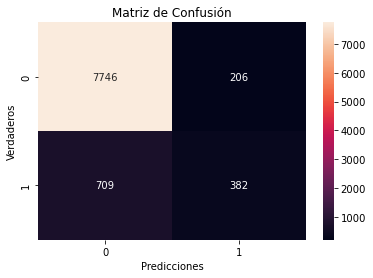

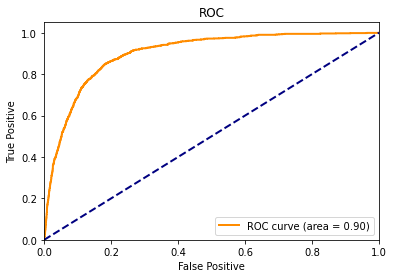

In [69]:
#Clasificación

# Convertir variables
df['y'] = df['y'].map({'yes': 1, 'no': 0})
categorical_vars = ['job', 'marital',  'housing', 'loan', 'contact', 'month', 'poutcome', 'education', 'default']
data = pd.get_dummies(df, columns=categorical_vars, drop_first=True)

# Train/test
X = data.drop('y', axis=1)
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Matriz de Confusión')
plt.ylabel('Verdaderos')
plt.xlabel('Predicciones')
plt.show()

# ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()


Como se ha podido ver en el ejercicio anterior, primero se ha tratado de observar alguna carácteristica básica del conjunto de datos.

- En la primera figura, se observa la distribución de las edades de los compradores estadísticamente. La mayoría de los compradores se sitúan entre los 33 y los 48 años.

- En la segunda la distribución del sueldo de los compradores en función de su edad.

- En la tercera visualización, se ha graficado un mapa de calor de la matriz de correlación entre las distintas variables para encontrar, si las hubiera, posibles relaciones entre ellas. En esta gráfica, se ha observado que las variables están muy poco relacionadas entre sí, la relación más destacada es entre el número de días desde el último contacto y el número de contactos realizados.

- En cuanto a la cuarta visualización, se observan los resultados de contacto en función del día del mes contactado.

- La quinta y sexta visualizaciones muestran la distribución de los compradores en función de su estado civil. Los datos muestran que la campaña ha funcionado mejor entre los clientes casados.

A continuación, se ha realizado un modelo de regresión lineal para clasificar los clientes en función de si ha contratado el depósito.
- Se observan los resultados estadísticos del modelo así como su matriz de confusión y su curva ROC. El modelo es relativamente eficaz aunque cometió errores especialmente en la clasificación de clientes que han comprado. Los resultados de la curva ROC son positivos con un AUC de 0.9 lo que muestra que puede predecir con cierta fiabilidad los suscriptores de los no suscriptores.

- Esto nos sugiere que, el modelo creado es capaz de predecir de una manera bastante aproximada si un nuevo cliente, en funcion de las variables de su trabajo, su estado civil, su educación, si tiene algún préstamo previo en situación de default, si cuenta con una hipoteca, si tiene un préstamo personal previo, el tipo de contacto, el mes en el que fue contactado y el resultado de la campaña anterior.

# Parte 2

In [71]:

df = pd.read_csv('./bank-full.csv', sep=';')

app = dash.Dash(__name__)

app.layout = html.Div([
    html.Label('Selecciona una característica:'),
    dcc.Dropdown(
        id='feature-dropdown',
        options=[{'label': i, 'value': i} for i in df.columns],
        value='age'
    ),
    #Graph 1
    dcc.Graph(id='feature-graph'),
    html.Label('Rango de edad:'),
    dcc.RangeSlider(
        id='age-slider',
        min=df['age'].min(),
        max=df['age'].max(),
        value=[df['age'].min(), df['age'].max()],
        marks={str(age): str(age) for age in range(df['age'].min(), df['age'].max(), 10)},
        step=1
    ),
    # Graf. 2
    dcc.Graph(id='age-distribution-graph'),

    html.Label('Selecciona el tipo de préstamo para el gráfico circular:'),
    dcc.Dropdown(
        id='loan-type-dropdown',
        options=[
            {'label': 'Préstamos personales', 'value': 'loan'},
            {'label': 'Hipotecas', 'value': 'housing'}
        ],
        value='loan'
    ),
    #graph 3
    dcc.Graph(id='loan-pie-chart'),
    #Graph. 4
    dcc.Graph(id='campaign-over-time-line-chart'),

])


@app.callback(
    Output('feature-graph', 'figure'),
    [Input('feature-dropdown', 'value')]
)
def update_graph(selected_feature):
    fig = px.box(df, x=selected_feature)
    return fig

@app.callback(
    Output('age-distribution-graph', 'figure'),
    [Input('age-slider', 'value')]
)
def update_age_distribution(selected_age_range):
    filtered_df = df[(df['age'] >= selected_age_range[0]) & (df['age'] <= selected_age_range[1])]
    fig = px.histogram(filtered_df, x='age')
    return fig
    
@app.callback(
    Output('campaign-over-time-line-chart', 'figure'),
    [Input('feature-dropdown', 'value')]
)
def update_campaign_over_time_line_chart(selected_feature):
    if 'month' in df.columns and 'campaign' in df.columns:
        campaign_data = df.groupby('month')['campaign'].count().reset_index()
        fig = px.line(campaign_data, x='month', y='campaign',
                      title='Cantidad de Contactos de la Campaña a lo Largo del Tiempo')
        return fig
    else:
        raise dash.exceptions.PreventUpdate

@app.callback(
    Output('loan-pie-chart', 'figure'),
    [Input('loan-type-dropdown', 'value')]
)
def update_loan_pie_chart(selected_loan_type):
    fig = px.pie(df, names=selected_loan_type, title='Tienen los clientes ya algún tipo de préstamo?')
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)




# Parte 3

Como se ha analizado en los datos anteriores, el perfil medio de los clientes es de la siguiente manera: la mayoría de los clientes se concentran en las edades de entre 33 y 48 años, estos clientes, en su mayoría tienen entre 72 y 1428 euros en su balance, estos están mayoritariamente casados aunque en proporción, la campaña ha funcionado mejor entre los clientes solteros, además, se observa que el 55,6% de los clientes que han contratado el depósito cuentan con una hipoteca.

No existe una gran correlación entre las variables.

Se ha creado un modelo que aproxima de manera bastante buena (AUC = 0.9) si un cliente va a contratar el depósito o no.

Se ha creado un dashboard en el que se pueden ajustar las visaulizaciones y graficar las proincipales distribuciones por variable, así como la distribución de clientes por edades y la proporción de clientes que han contratado en función de si tienen algún préstamo anterior ajustándolo con un desplegable.

En cuanto a recomendaciones para el banco, debería de enfocarse en los clientes mayores de 48 años, ya que estos son los que cuentan con mayor capital (en función de sus balances) y entre los que la campaña no está funcionando tan bien. Los clientes que cuentan ya con una hipoteca son los que mejor responden a estos depósitos, por lo que podría ser interesante lanzar una nueva campaña enfocada en los que ya tienen un préstamo personal en el banco y además tienen más de 48 años. Una posible opción podría ser revisar si la manera en la que se distibuye esta campaña de marketing está creada en un formato fácil para los clientes de mayor edad.